# ICE - Video Games Online Store

### Introduction

Data ini terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka.

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.


### Goal

Menemukan game yang paling potensial dan merencanakan kampanye iklan di tahun 2017

### Stages

**Objectives:** Mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak
1. Data preparation
2. Data analysis
3. User profiling
4. Hypotheses test


Data ini diambil pada tahun 2016 dengan penjelasan sebagai berikut:
- `Name` : Nama game
- `Platform` - Platform game
- `Year_of_Release` - Tahun rilis
- `Genre` - Genre game
- `NA_sales` - Penjualan di Amerika Utara dalam satuan juta USD
- `EU_sales` - Penjualan di Eropa dalam satuan juta USD
- `JP_sales` - Penjualan di Jepang dalam satuan juta USD
- `Other_sales` - Penjualan di negara lainnya dalam satuan juta USD
- `Critic_Score` - Skor ulasan dari kritikus, maksimal 100
- `User_Score` - Skor ulasan dari pengguna, maksimal 10
- `Rating` - ESRB

## Pengecekan Kualitas & Modifikasi Data

### Pengecekan Kualitas Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

In [ ]:
game = pd.read_csv('/datasets/games.csv')

In [ ]:
game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
game.duplicated().sum()

0

**Findings**
1. Nama kolom dimulai dari uppercase; akan diganti menjadi lowercase
2. Terdapat 2 baris kosong pada kolom `Name`; akan dicek lebih lanjut
3. kolom `Year_of_Release` bertipe float; tipe data ini tidak akan dirubah karena tidak memiliki tanggal dan bulan
4. kolom `User_Score` bertipe object tetapi sesuai deskripsi seharusnya kolom ini adalah float atau int; akan dicek lebih lanjut
5. Tidak ada data duplikat

------------

In [ ]:
game.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Mengubah semua nama kolom menjadi lowercase

game.columns = map(str.lower, game.columns)
game = game.rename(columns = {'year_of_release':'release_year'})

In [ ]:
game.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
game.loc[game.name.isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Informasi pada baris ini terlalu sedikit (terlalu banyak missing value pada kolom); baris ini akan dihapus

-------------

In [ ]:
game = game.loc[game.name.notnull()].reset_index(drop = True)

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16444 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
game.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.3       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [ ]:
game.loc[game.user_score == 'tbd'].head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Baris yang berisi 'tbd' akan dibiarkan saja untuk sementara

--------------------------

In [ ]:
game.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Terdapat kesalahan pada `Platform DS`, ada game yang rilis di tahun sebelum pembuatan konsol tersebut yaitu 2004

In [ ]:
game.loc[game.platform == 'DS']['release_year'].min()

1985.0

In [ ]:
game.loc[(game.platform == 'DS') & (game.release_year < 2004)]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15955,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Dari pencarian di internet, game di atas dirilis pada tahun 2010, maka `release_year` pada game ini akan diganti menjadi 2010

In [ ]:
# Mengubah release year

game.loc[(game.platform == 'DS') & (game.release_year == 1985), 'release_year'] = 2010

In [ ]:
game.loc[game.name == 'Strongest Tokyo University Shogi DS']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15955,Strongest Tokyo University Shogi DS,DS,2010.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Tahun rilis telah diubah

------------

### Modifikasi Data

**Mengisi missing value pada `release_year`**

Value pada kolom ini akan diisi median dari platformnya karena semua pabrik platform tidak akan mengeluarkan game baru pada platform yang 1 generasi lebih tua dari platform terbaru. 

Jadi range tahun risil game adalah tanggal rilis platform sampai tanggal rilis platform generasi terbaru.

In [ ]:
# Mengisi missing value `release_year` dengan acuan platform

grouped_values = game.groupby('platform')['release_year'].median().reset_index()
size = len(grouped_values)
for i in range(size):
  group = grouped_values['platform'][i]
  value = grouped_values['release_year'][i]
  game.loc[(game['platform']==group) & (game['release_year'].isna()), 'release_year'] = value

In [ ]:
game['release_year'] = pd.to_datetime(game['release_year'], format = '%Y').dt.year

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Kolom-kolom rating yang berisi missing value akan dibiarkan seperti itu saja agar tidak merusak kualitas dari rating tersebut karena terlalu banyak missing value yang harus diisi

----------------

In [ ]:
# Menjumlahkan total sale seluruh dunia

game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

In [ ]:
game.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
game.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
game.loc[game.user_score == '0']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2834,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E,0.72


In [ ]:
game.loc[game.user_score == 'tbd'].head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40


**Findings**
1. Terdapat value 0 pada 1 baris; value ini akan diganti dengan `np.nan`
2. Score tbd bukan karena tahun rilis game yang masih baru; nilai tbd akan diganti dengan `np.nan`

----------------------

In [ ]:
game.loc[game.user_score == 'tbd', 'user_score'] = np.NaN
game.reset_index(drop = True, inplace = True)
game['user_score'] = game['user_score'].astype('float')

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
 11  total_sales   16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Analisis Data

### Analisis 1

**Meninjau banyaknya game yang dirilis pada tahun yang berbeda**

In [ ]:
grouped_year = game.groupby('release_year')['name'].count().reset_index()
grouped_year.rename(columns={'name':'game_count'}, inplace=True)

In [ ]:
grouped_year.head()

,release_year,game_count
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14


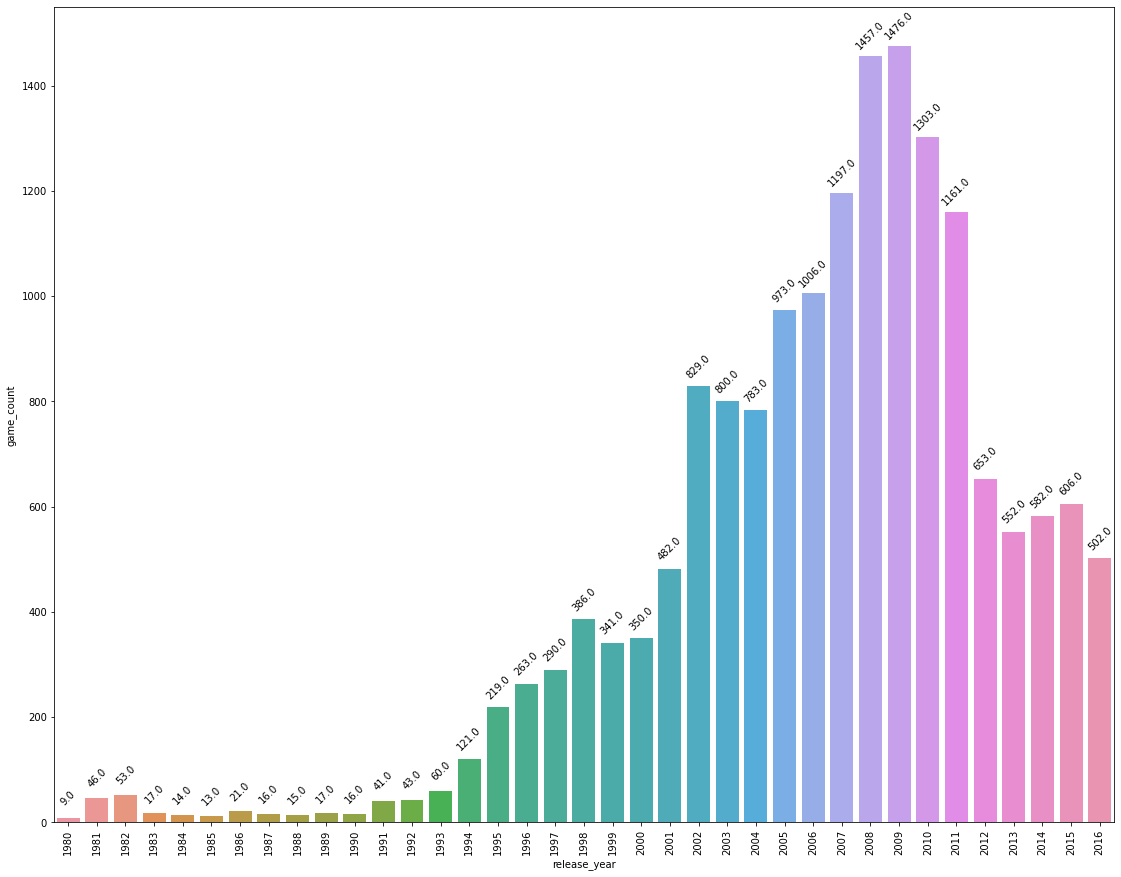

In [ ]:
# Distribusi tahun rilis semua game

plt.figure(figsize=(19, 15))
splot = sns.barplot(data=grouped_year, x='release_year', y='game_count')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.show()

**Finding**

- Data perlahan naik dan memuncak di range tahun 2005 - 2010 lalu kemudian menurun
- Puncak banyaknya game yang dirilis adalah pada tahun 2009 dengan total 1476 game

-------

### Analisis 2

**Melihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Lalu pilih platform dengan total penjualan terbesar dan dibuatkan distribusinya berdasarkan data per tahun. Lalu mencari platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun.**

**Berapa lama umumnya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?**

In [ ]:
# Mengelompokkan data berdasarkan platform

platform_grouped = game.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False)
platform_grouped.head()

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [ ]:
ps2 = game[game['platform'] == 'PS2'].groupby('release_year')['total_sales'].sum().reset_index()

In [ ]:
ps2.head()

,release_year,total_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81


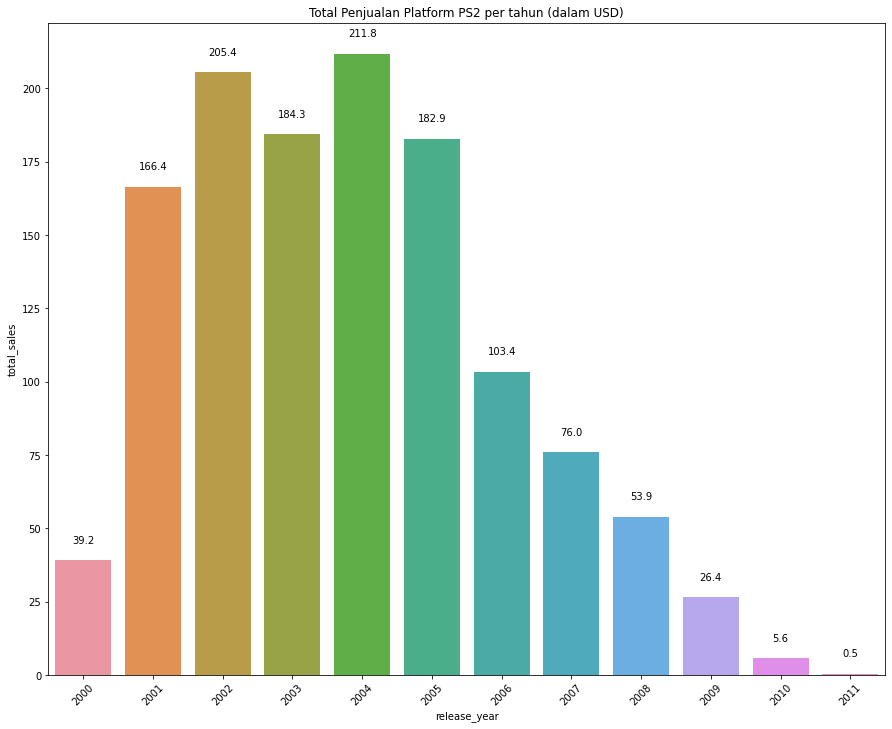

In [ ]:
# Melihat distribusi data per tahun untuk platform dengan total penjualan terbesar

plt.figure(figsize=(15, 12))
splot = sns.barplot(data = ps2, x = 'release_year', y = 'total_sales')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=0,
                   textcoords = 'offset points')

plt.title('Total Penjualan Platform PS2 per tahun (dalam USD)')
plt.xticks(rotation = 45)
plt.show()

**Finding**
- Penjualan berawal dari tahun 2000 dan berakhir pada 2011
- Penjualan memuncak di sektiar tahun 2001-2004 lalu perlahan menurun, awal 5 tahun dari masa konsol tersebut

----------

**Mencari platform populer yang tidak merilis game lagi pada tahun 2016 (sudah tidak populer)**

In [ ]:
# Platform popular yang akan diambil adalah yang memiliki penjualan di atas percentile 30 nya

percentile = np.quantile(platform_grouped.total_sales, 0.30)
p30 = platform_grouped.loc[platform_grouped.total_sales > percentile, 'platform']
p30

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
6      GBA
18     PS4
19     PSP
13      PC
2      3DS
29      XB
5       GB
11     NES
10     N64
23    SNES
7       GC
30    XOne
0     2600
27    WiiU
20     PSV
Name: platform, dtype: object

In [ ]:
# Mencari platform yang popular

popular = game.loc[game.platform.isin(p30)]

In [ ]:
# Mencari platform yang tidak lagi popular

pivot_popular = pd.pivot_table(popular, columns='release_year', index='platform', values='total_sales', aggfunc='sum').reset_index().fillna(0)
pivot_popular.head()

release_year,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,39.38,5.84,0.27,0.45,0.67,1.94,0.74,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,57.76,43.76,27.78,15.14
2,DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,146.94,148.65,119.54,85.04,26.18,11.01,1.54,0.00,0.00,0.00
3,GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Platform yang tidak popular lagi

notpopular = list(pivot_popular.loc[pivot_popular[2016] == 0, 'platform'])
notpopular

['2600',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PS',
 'PS2',
 'PSP',
 'SNES',
 'XB']

In [ ]:
# Memfilter platform yang sudah tidak popular lagi

game_notpopular = game.loc[(game.platform).isin(notpopular)]

In [ ]:
game_notpopular.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [ ]:
# Buat pivot table untuk platform yang popular lagi

pivot_notpupular = pd.pivot_table(game_notpopular, columns='platform', index='release_year', values='total_sales', aggfunc='sum').reset_index().fillna(0)

In [ ]:
pivot_notpupular.head()

platform,release_year,2600,DS,GB,GBA,GC,N64,NES,PS,PS2,PSP,SNES,XB
0,1980,11.38,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,1981,35.68,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,1982,39.38,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,1983,5.84,0.0,0.0,0.0,0.0,0.0,10.96,0.0,0.0,0.0,0.0,0.0
4,1984,0.27,0.0,0.0,0.0,0.0,0.0,50.08,0.0,0.0,0.0,0.0,0.0


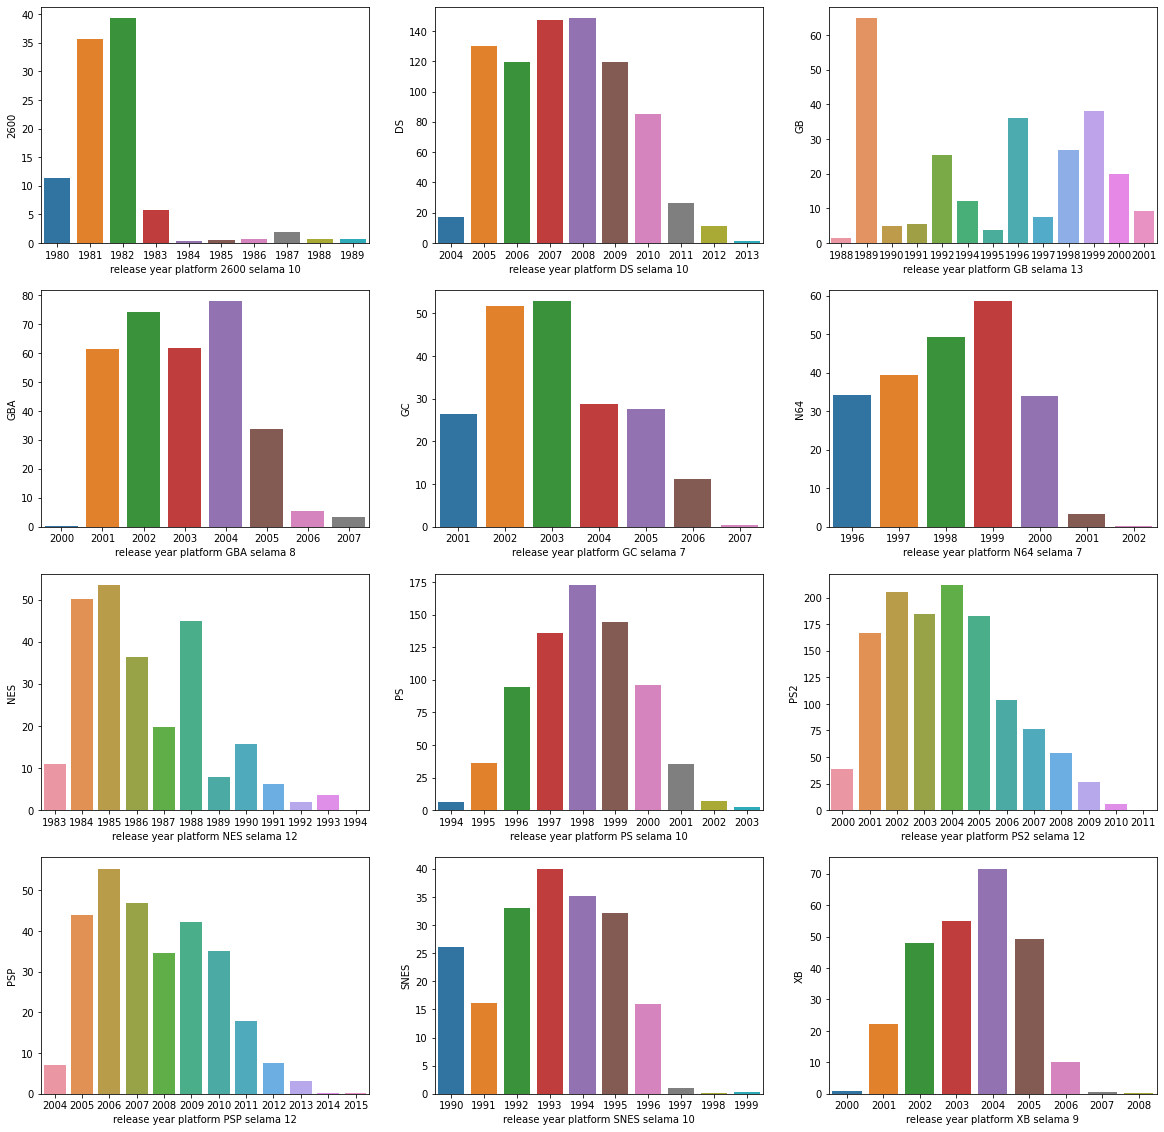

In [ ]:
# Melihat distribusi penjualan per tahun dari platform yang sudah tidak popular

plt.figure(figsize=(20, 20))
i = 1
for platform in notpopular:
    jml_thn = pivot_notpupular.loc[pivot_notpupular[platform] > 0]['release_year']
    plt.subplot(4, 3, i)
    year = pivot_notpupular[pivot_notpupular[platform] > 0]
    sns.barplot(data=pivot_notpupular, x=year['release_year'], y=platform)
    plt.xlabel(f'release year platform {platform} selama {len(jml_thn)}')
    
    i = i + 1
    
plt.show()

**Finding**
- Umur rata-rata konsol/platform adalah 10 tahun
- Umumnya platform mengalami puncak penjualan di awal sampai pertengahan rilis (0-5 tahun) lalu perlahan menurun

**Insight**
- Ketika ingin menjual game ada baiknya melihat umur dari platform tersebut

**Recomendation**
- Waktu paling ideal untuk menjual game dari platform yang bersangkutan adalah ketika umur platform tersebut berada di bawah 5 tahun

-----------

### Analisis 3

**Menentukan periode waktu pengambilan data**

Data akan diiris dengan parameter `release_year` = 2013. Hal ini dilakukan untuk menjadi acuan pada tahun 2017

In [ ]:
game_new = game[game['release_year'] >= 2013].reset_index(drop = True)

**Platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut? Pilih beberapa platform yang berpotensi menghasilkan keuntungan**

In [ ]:
# Pivot table untuk melihat penjualan per platform dari tahun ke tahun

platform_new = pd.pivot_table(data = game_new, index = 'release_year', columns = 'platform', values = 'total_sales', aggfunc = 'sum', margins = True).reset_index().fillna(0)

In [ ]:
platform_new

platform,release_year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
0,2013,57.76,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,362.43
1,2014,43.76,0.00,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07,331.79
2,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14,267.98
3,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15,129.94
4,All,144.44,1.54,39.43,181.43,314.14,3.50,33.25,13.66,64.63,136.80,159.32,1092.14


In [ ]:
platform_new.columns = platform_new.columns.astype(str)

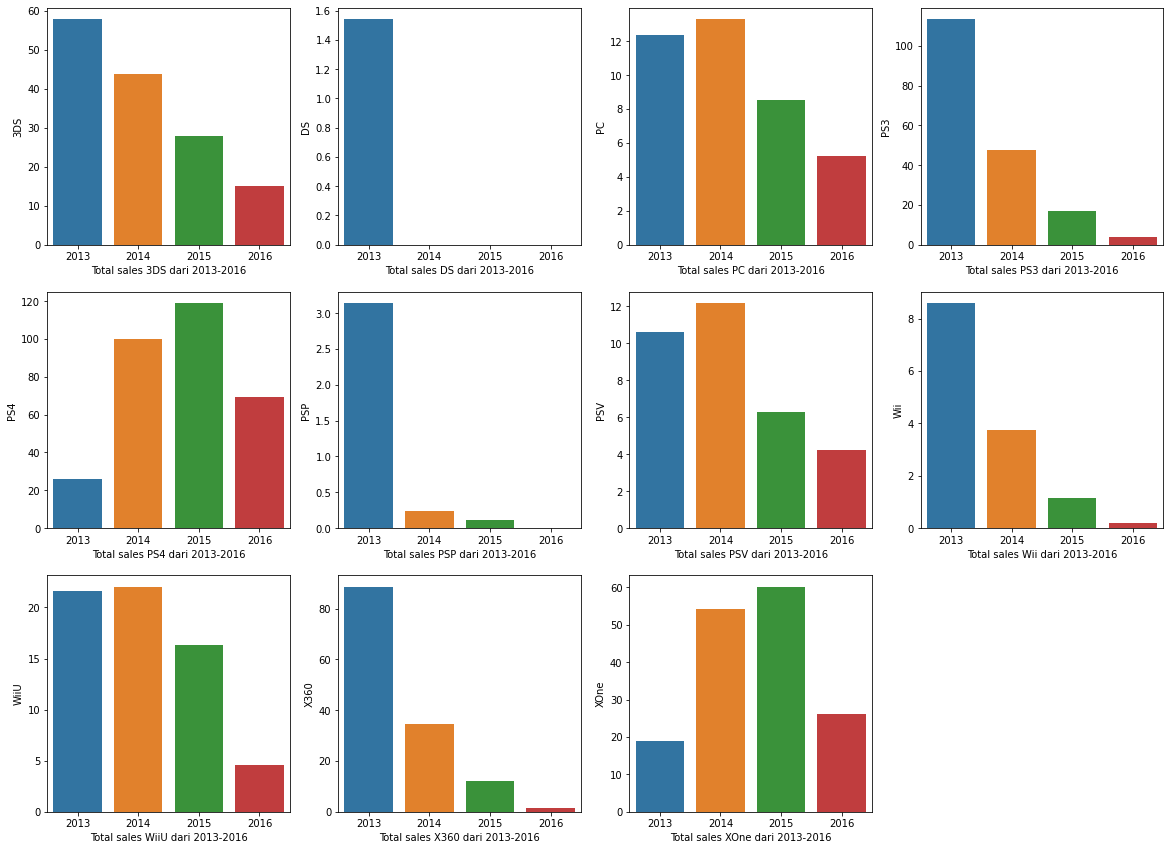

In [ ]:
plt.figure(figsize=(20, 20))
i = 1
for platform in platform_new:
  if platform != 'All' and platform != 'release_year':
    plt.subplot(4, 4, i)
    sns.barplot(data=platform_new.iloc[0:4], x="release_year", y=platform)
    plt.xlabel(f'Total sales {platform} dari 2013-2016')
    
    i = i + 1
plt.show()

In [ ]:
print(f'Awal penjualan PS4 di tahun {game.loc[game.platform == "PS4"]["release_year"].min()}')
print()
print(f'Awal penjualan XOne di tahun {game.loc[game.platform == "XOne"]["release_year"].min()}')

Awal penjualan PS4 di tahun 2013

Awal penjualan XOne di tahun 2013


**Findings:**
- PS4 memiliki penjualan terbanyak selama 3 tahun
- DS memiliki penjualan paling sedikit. Mulai tahun 2014 tidak melakukan penjualan apapun
- **Semua** platform mengalami penurunan pada tahun 2016
- Hanya ada 2 platform yang mencapai puncak penjualan pada tahun 2015, yaitu `PS4` dan `XOne`

**Insight:**
- PS4 dan XOne mencapai puncak penjualan di tahun ke-2 platform, sesuai dengan **findings** analisis sebelumnya

**Recomendation:**

- Game keluaran PS4 dan XOne berpotensi menghasilkan keuntungan

In [ ]:
del game

### Analisis 4

Buatlah sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform? Deskripsikan penemuan Anda

In [ ]:
platform_new = pd.pivot_table(data = game_new, index = 'platform', values = 'total_sales', aggfunc = 'mean').reset_index().sort_values(by = 'total_sales', ascending = False)

In [ ]:
platform_new

,platform,total_sales
4,PS4,0.801378
9,X360,0.735484
10,XOne,0.645020
7,Wii,0.593913
8,WiiU,0.562000
3,PS3,0.525884
0,3DS,0.464437
2,PC,0.208624
1,DS,0.192500
6,PSV,0.092618


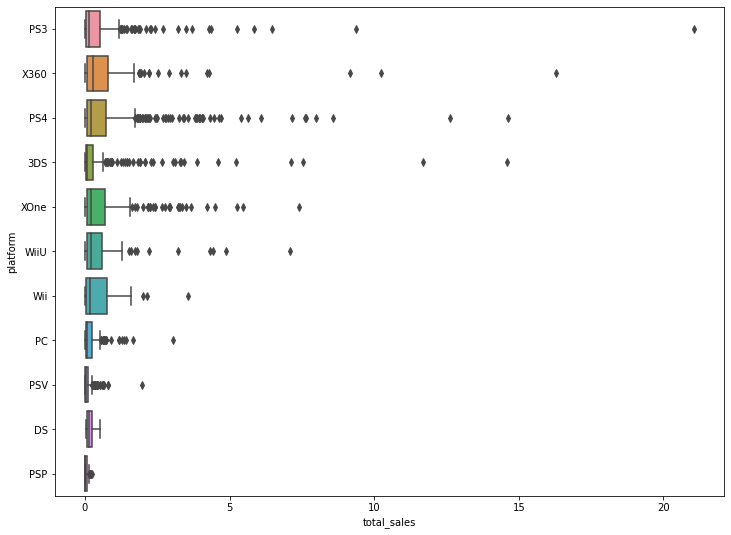

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=game_new, x='total_sales', y='platform')
plt.show()

**Findings:**
- Rata-rata penjualan global setiap platform bervariasi
- PS3 memiliki rata-rata penjualan terbesar
- PSP memiliki rata-rata penjualan terkecil

**Insight**

Terdapat outlier yang terjauh dari outlier lainnya. Ada satu pada PS3, X360, PS4, dan 3DS. Outlier ini dapat dikatakan game yang **booming** karena memiliki penjualan yang cukup besar

**Recomendation**

Menjual game yang **booming** adalah langkah yang tepat

### Analisis 5

Lihatlah bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer. Buatlah sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Tarik kesimpulannya.

In [ ]:
# PS4 sebagai salah satu platform yang populer

ps4 = game_new.loc[game_new.platform == 'PS4'][['name', 'platform', 'critic_score', 'user_score', 'total_sales']]

In [ ]:
ps4.head()

,name,platform,critic_score,user_score,total_sales
2,Call of Duty: Black Ops 3,PS4,NaN,NaN,14.63
4,Grand Theft Auto V,PS4,97.0,8.3,12.62
9,FIFA 16,PS4,82.0,4.3,8.58
10,Star Wars Battlefront (2015),PS4,NaN,NaN,7.98
11,Call of Duty: Advanced Warfare,PS4,83.0,5.7,7.66


<AxesSubplot:>

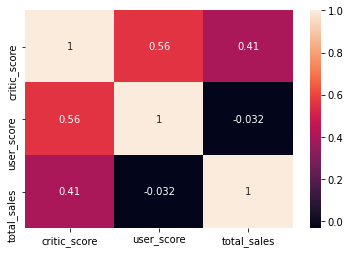

In [ ]:
sns.heatmap(ps4.corr(), annot=True)

**Findings:**
- Terdapat relasi positif sedang (0.41) antara `total_sales` dan `critic_score`
- Relasi antara `user_score` dan `total_sales` hanya 0.03

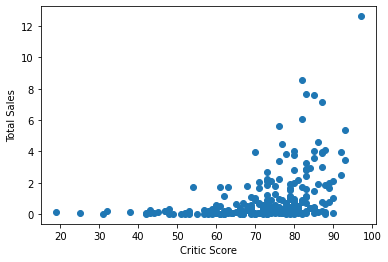

In [ ]:
plt.scatter(x = ps4['critic_score'], y = ps4['total_sales']);
plt.xlabel("Critic Score");
plt.ylabel("Total Sales");
plt.show()

**Finding**

Dengan bagusnya kritik profesional maka akan memungkinkan game banyak terjual

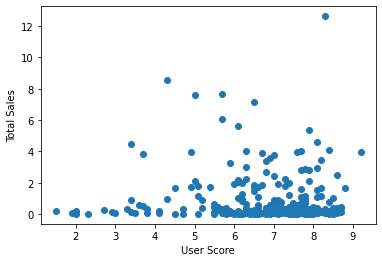

In [ ]:
plt.scatter(x = ps4['user_score'], y = ps4['total_sales']);
plt.xlabel("User Score");
plt.ylabel("Total Sales");
plt.show()

**Finding**

Plot terlihat random, tidak ada info yang dapat diambil

-----------------

### Analisis 6

**Dengan mengingat kesimpulan Anda sebelumnya, bandingkan penjualan game yang sama pada platform lain**

In [ ]:
# Melihat game dengan critic_score tertinggi pada platform PS4 dan membandingkannya dengan platform lain

ps4.sort_values(by = 'critic_score', ascending = False).head()

,name,platform,critic_score,user_score,total_sales
4,Grand Theft Auto V,PS4,97.0,8.3,12.62
23,Uncharted 4: A Thief's End,PS4,93.0,7.9,5.39
59,Metal Gear Solid V: The Phantom Pain,PS4,93.0,8.2,3.42
88,Bloodborne,PS4,92.0,8.6,2.48
44,The Witcher 3: Wild Hunt,PS4,92.0,9.2,3.97


In [ ]:
game_new.loc[(game_new.name == 'Grand Theft Auto V') & (game_new.platform != 'PS4')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
229,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


**Terdapat total 5 platform pada game Grand Theft Auto V**

In [ ]:
# Melihat top 3 penjualan pada platform PS3

game_new[game_new['platform']== 'PS3'].sort_values(by = 'total_sales', ascending = False).iloc[0:3]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
18,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


In [ ]:
# Melihat top 3 penjualan pada platform X360

game_new[game_new['platform']== 'X360'].sort_values(by = 'total_sales', ascending = False).iloc[0:3]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18


In [ ]:
# Melihat top 3 penjualan pada platform XOne

game_new[game_new['platform']== 'XOne'].sort_values(by = 'total_sales', ascending = False).iloc[0:3]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
24,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26


In [ ]:
# Melihat top 3 penjualan pada platform PC

game_new[game_new['platform']== 'PC'].sort_values(by = 'total_sales', ascending = False).iloc[0:3]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
73,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
157,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
184,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42


**Finding**
- Grand Theft Auto Masuk ke dalam **Top 3** penjualan terbanyak di setiap platformnya kecuali di platform PC

### Analisis 7

Amati distribusi umum game berdasarkan genre. Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Dapatkah Anda melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [ ]:
genres = game_new['genre'].value_counts().reset_index()

In [ ]:
genres['index']

0           Action
1     Role-Playing
2        Adventure
3           Sports
4          Shooter
5             Misc
6           Racing
7         Fighting
8         Platform
9       Simulation
10        Strategy
11          Puzzle
Name: index, dtype: object

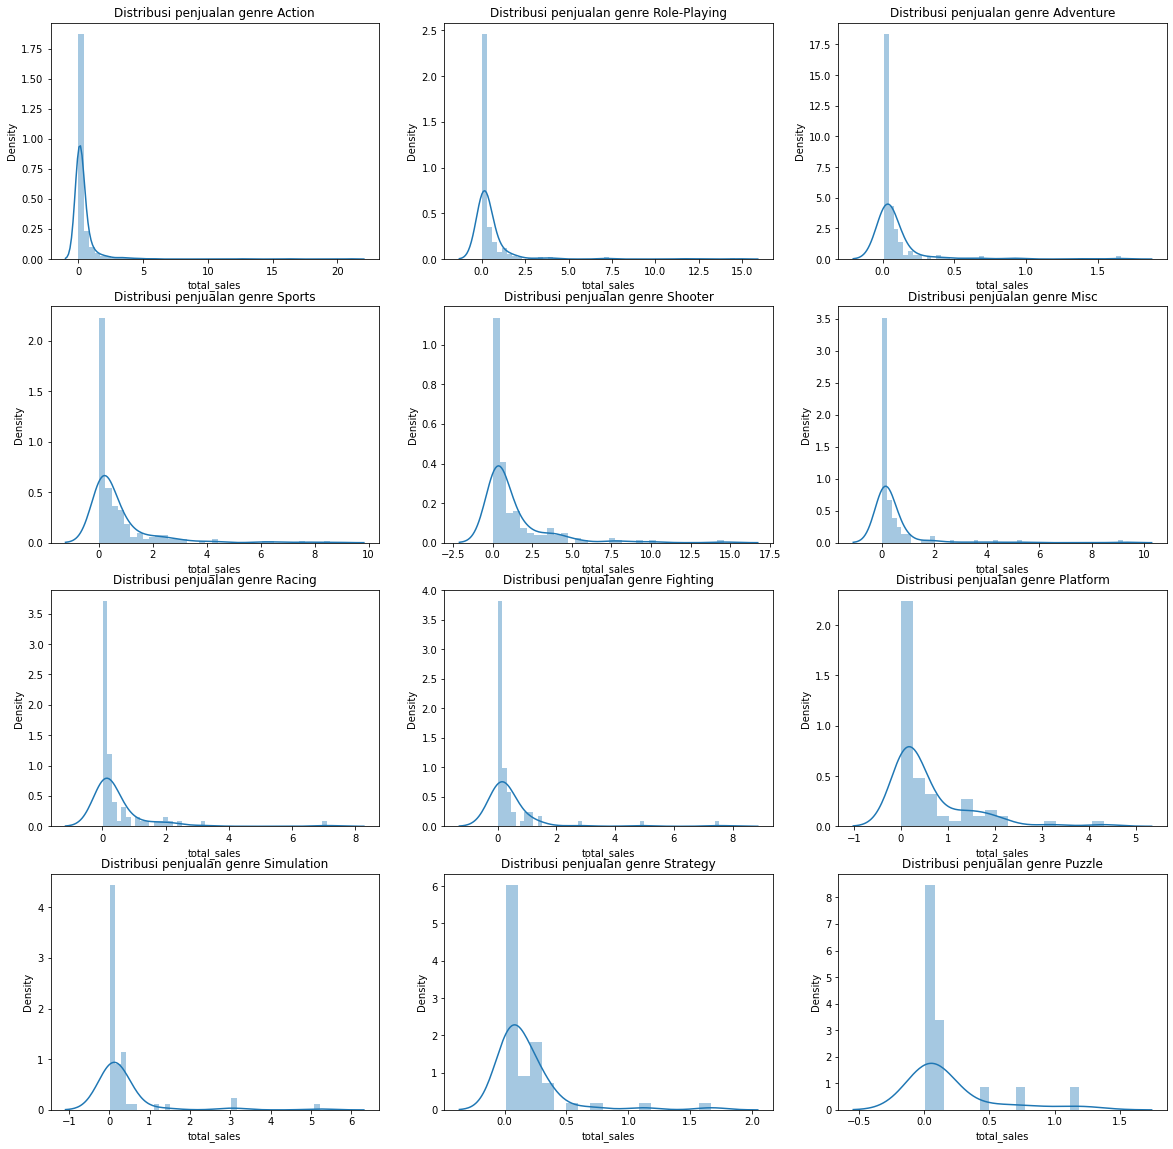

In [ ]:
plt.figure(figsize=(20, 20))
i = 1
for genre in genres['index']:
    plt.subplot(4, 3, i)
    plt.title(f'Distribusi penjualan genre {genre}')
    sns.distplot(game_new.loc[game_new.genre == genre]['total_sales']);
    i = i + 1
plt.show()

In [ ]:
game_new.groupby('genre')['total_sales'].mean().sort_values(ascending = False)

genre
Shooter         1.239628
Sports          0.700791
Platform        0.576081
Role-Playing    0.497211
Racing          0.464884
Fighting        0.441375
Action          0.420169
Misc            0.405290
Simulation      0.347656
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096463
Name: total_sales, dtype: float64

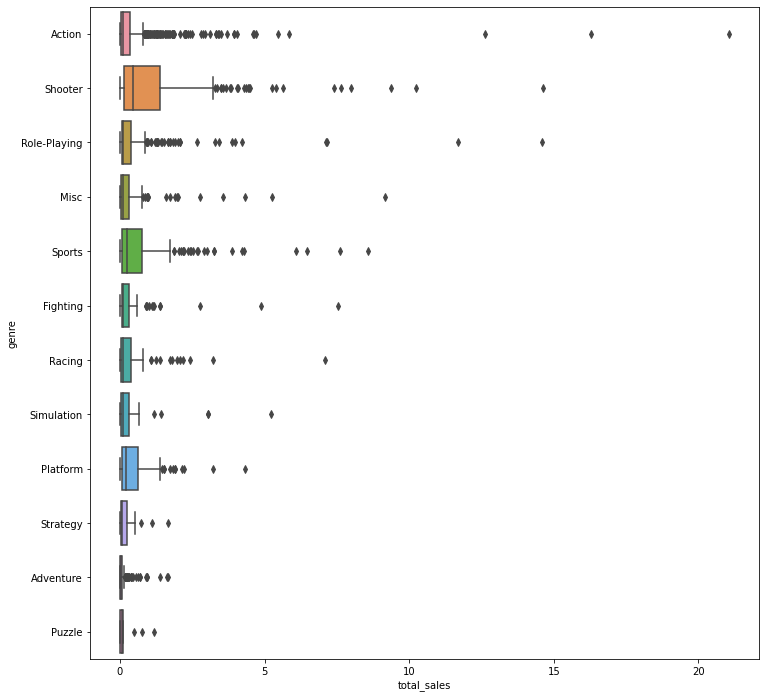

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=game_new, x='total_sales', y='genre')
plt.show()

**Findings:**

Dari tabel distribusi dan boxplot di atas dapat dilihat bahwa genre `Shooter` memiliki rata-rata yang paling besar dan juga memiliki range Q1 sampai Q4 yang lebih panjang daripada genre yang lainnya. Genre `Puzzle`, `Adventure` dan `Strategy` adalah merupakan genre yang paling tidak menguntungkan.

**Recomendation**
- Jangan menjual game dengan genre `Puzzle`, `Adventure` dan `Strategy`
- Disarankan untuk menjual game dengan genre `Action` atau `Shooter`

## User Profiling

Untuk setiap wilayah (NA, EU, JP), tentukan:
- 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
- 5 genre teratas. Jelaskan perbedaannya.
- Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

### Lima platform teratas masing-masing region

In [ ]:
# Top 5 platform na_region

na_platform = pd.pivot_table(data = game_new, index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

In [ ]:
na_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,39.04


In [ ]:
# Top 5 platform eu_region

eu_platform = pd.pivot_table(data = game_new, index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

In [ ]:
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,31.17


In [ ]:
# Top 5 platform jp_region

jp_platform = pd.pivot_table(data = game_new, index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

In [ ]:
jp_platform

,jp_sales
platform,
3DS,67.86
PS3,23.35
PSV,18.66
PS4,15.96
WiiU,10.88


**Findings:**
- Region NA dan EU memiliki varian platform yang sama
- Region JP berbeda dengan kedua region lainnya dengan 3DS, PS3, PSV, PS4, dan WiiU sebagai Top 5 platform. Region ini memiliki 3 kesamaan dengan region lainnya yaitu pada PS3, PS4, dan 3DS

### Lima genre teratas masing-masing region

In [ ]:
# Top 5 genre na_region

na_genre = pd.pivot_table(data = game_new, index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

In [ ]:
na_genre.sort_values(by = 'genre')

,na_sales
genre,
Action,126.23
Misc,27.49
Role-Playing,46.51
Shooter,109.78
Sports,65.27


In [ ]:
# Top 5 genre eu_region

eu_genre = pd.pivot_table(data = game_new, index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

In [ ]:
eu_genre.sort_values(by = 'genre')

,eu_sales
genre,
Action,118.32
Racing,20.19
Role-Playing,37.02
Shooter,87.88
Sports,60.52


In [ ]:
# Top 5 genre jp_region

jp_genre = pd.pivot_table(data = game_new, index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

In [ ]:
jp_genre.sort_values(by = 'genre')

,jp_sales
genre,
Action,40.49
Fighting,7.65
Misc,9.20
Role-Playing,51.14
Shooter,6.61


**Findings:**

Action
Misc
Role-Playing
Shooter
Sports
Racing	
Fighting



- Genre `Action` berapa di posisi paling atas pada semua region
- genre `Action`, `Role-Playing` dan `Shooter` berapa pada Top 5 genre di semua region
- Terdapat 7 genre berbeda dari total 3 region tersebut
  - Action
  - Misc
  - Role-Playing
  - Shooter
  - Sports
  - Racing	
  - Fighting

### Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [ ]:
game_new['rating'] = game_new['rating'].astype('category').cat.codes

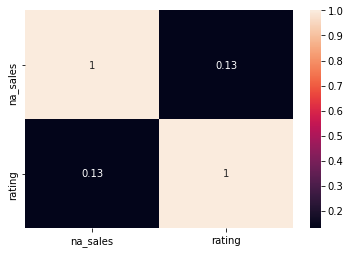

In [ ]:
na_region = game_new[['na_sales', 'rating']]
sns.heatmap(na_region.corr(), annot=True);

**Finding**

Tidak ada korelasi kuat antara rating dengan penjualan di region NA

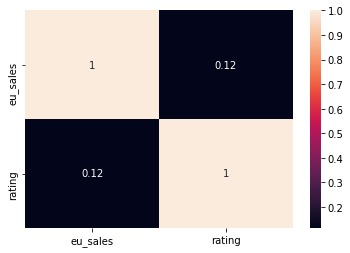

In [ ]:
eu_region = game_new[['eu_sales', 'rating']]
sns.heatmap(eu_region.corr(), annot=True);

**Finding**

Tidak ada korelasi kuat antara rating dengan penjualan di region EU

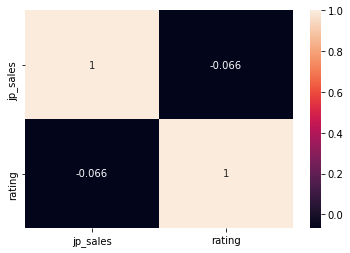

In [ ]:
jp_region = game_new[['jp_sales', 'rating']]
sns.heatmap(jp_region.corr(), annot=True);

**Finding**

Tidak ada korelasi kuat antara rating dengan penjualan di region JP

**Recomendation:**
- Menjual game dari konsol PS3, PS4, atau 3DS karena konsol ini berada pada top 5 platform disemua region
- Menjual game dengan genre Action, Role-Playing atau Shooter karena genre ini berada pada top 5 genre disemua region
- Rating ESRB tidak berpengaruh penjualan disemua region jadi tidak ada masalah dengan menjual game dengan rating apapun

## Uji Hipotesis

Rata-rata rating pengguna platform Xbox One dan PC adalah sama

Rata-rata rating pengguna genre Action dan Sports berbeda

Nilai alpha yang ditentukan adalah 0.05. Nilai ini dirasa cukup untuk pengujian hipotesis ini karena jika nilainya lebih tinggi maka *confidence level* akan berkurang

### Hipotesis 1

H0: Rata-rata rating pengguna platform Xbox One dan PC adalah **SAMA**

H1 : Rata-rata rating pengguna platform Xbox One dan PC **TIDAK SAMA**

In [ ]:
xone_rating = game_new.loc[game_new.platform == 'XOne']['user_score']
xone_rating = xone_rating.dropna().reset_index(drop = True)

In [ ]:
len(xone_rating)

182

Panjang dari dua data berbeda, `xone_rating` memiliki panjang 182, lebih panjang dari `pc_rating`

Akan diambil sample secara acak sebanyak 155 (panjang data `pc_rating`) pada data `xone_rating`

In [ ]:
xone_rating = xone_rating.sample(n=155)

In [ ]:
len(xone_rating)

155

In [ ]:
pc_rating = game_new.loc[game_new.platform == 'PC']['user_score']
pc_rating = pc_rating.dropna().reset_index(drop = True)

In [ ]:
len(pc_rating)

155

In [ ]:
print(f'variance xone_rating: {np.var(xone_rating)}')
print()
print(f'variance pc_rating: {np.var(pc_rating)}')

variance xone_rating: 1.932951508844953

variance pc_rating: 3.016306347554631


In [ ]:
# Cek kesetaraan variance

equal_variance = np.var(pc_rating)/np.var(xone_rating)

if equal_variance < 4:
    print('variance setara')
else:
    print('variance tidak setara')

variance setara


In [ ]:
alpha = 0.05
result = st.ttest_ind(xone_rating, pc_rating, equal_var = True)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 diterima')

0.11934254949523605

H0 diterima


**HASILNYA:** Rata-rata rating pengguna platform Xbox One dan PC adalah **SAMA**

### Hipotesis 2

H0: Rata-rata rating pengguna genre Action dan Sports adalah **SAMA**

H1 : Rata-rata rating pengguna genre Action dan Sports **TIDAK SAMA**

In [ ]:
action_rating = game_new.loc[game_new.genre == 'Action']['user_score']
action_rating = action_rating.dropna().reset_index(drop = True)

In [ ]:
len(action_rating)

390

Panjang dari dua data berbeda, `action_rating` memiliki panjang 390, lebih panjang dari `sports_rating`

Akan diambil sample secara acak sebanyak 160 (panjang data `sports_rating`) pada data `action_rating`

In [ ]:
action_rating = action_rating.sample(n = 160)

In [ ]:
len(action_rating)

160

In [ ]:
sports_rating = game_new.loc[game_new.genre == 'Sports']['user_score']
sports_rating = sports_rating.dropna().reset_index(drop = True)

In [ ]:
len(sports_rating)

160

In [ ]:
print(f'variance action_rating: {np.var(action_rating)}')
print()
print(f'variance sports_rating: {np.var(sports_rating)}')

variance action_rating: 1.6379808593749998

variance sports_rating: 3.160733984375


In [ ]:
# Cek kesetaraan variance

equal_variance = np.var(sports_rating)/np.var(action_rating)

if equal_variance < 4:
    print('variance setara')
else:
    print('variance tidak setara')

variance setara


In [ ]:
alpha = 0.05
result = st.ttest_ind(action_rating, sports_rating, equal_var = True)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 diterima')

2.274857180086628e-18

H0 ditolak


**HASILNYA:** Rata-rata rating pengguna genre Action dan Sports **TIDAK SAMA**

## Kesimpulan

### Pengecekan Kualitasn & Modifikasi Data
- Nama kolom dimulai dari uppercase; akan diganti menjadi lowercase
- Terdapat 2 baris kosong pada kolom `Name`; akan dicek lebih lanjut
- kolom `Year_of_Release` bertipe float; tipe data ini tidak akan dirubah karena tidak memiliki tanggal dan bulan
- kolom `User_Score` bertipe object tetapi sesuai deskripsi seharusnya kolom ini adalah float atau int; akan dicek lebih lanjut
- Tidak ada data duplikat
- Mengisi missing value pada kolom `release_year`
- Terdapat value 0 pada 1 baris; value ini akan diganti dengan np.nan
- Score tbd bukan karena tahun rilis game yang masih baru; nilai tbd akan diganti dengan np.nan


### Analisis Data
#### Analisis 1
- Data perlahan naik dan memuncak di range tahun 2005 - 2010 lalu kemudian menurun

#### Analisis 2
- Penjualan berawal dari tahun 2000 dan berakhir pada 2011
- Penjualan memuncak di sektiar tahun 2001-2004 lalu perlahan menurun, awal 5 tahun dari masa konsol tersebut
- Umur rata-rata konsol/platform adalah 10 tahun
- Umumnya platform mengalami puncak penjualan di awal sampai pertengahan rilis (0-5 tahun) lalu perlahan menurun
- Ketika ingin menjual game ada baiknya melihat umur dari platform tersebut
##### Rekomendasi
- Waktu paling ideal untuk menjual game dari platform yang bersangkutan adalah ketika umur platform tersebut berada di bawah 5 tahun

#### Analisis 3
- PS4 memiliki penjualan terbanyak selama 3 tahun
- DS memiliki penjualan paling sedikit. Mulai tahun 2014 tidak melakukan penjualan apapun
- **Semua** platform mengalami penurunan pada tahun 2016
- Hanya ada 2 platform yang mencapai puncak penjualan pada tahun 2015, yaitu `PS4` dan `XOne`
- PS4 dan XOne mencapai puncak penjualan di tahun ke-2 platform, sesuai dengan **findings** analisis sebelumnya
##### Rekomendasi
- Game keluaran PS4 dan XOne berpotensi menghasilkan keuntungan

#### Analisis 4
- Rata-rata penjualan global setiap platform bervariasi
- PS3 memiliki rata-rata penjualan terbesar
- PSP memiliki rata-rata penjualan terkecil

Terdapat outlier yang terjauh dari outlier lainnya. Ada satu pada PS3, X360, PS4, dan 3DS. Outlier ini dapat dikatakan game yang **booming** karena memiliki penjualan yang cukup besar
##### Rekomendasi
- Menjual game yang **booming** adalah langkah yang tepat

#### Analisis 5
- Terdapat relasi positif sedang (0.41) antara `total_sales` dan `critic_score`
- Relasi antara `user_score` dan `total_sales` hanya 0.03
- Dengan bagusnya kritik profesional maka akan memungkinkan game banyak terjual

#### Analisis 6
- Grand Theft Auto Masuk ke dalam **Top 3** penjualan terbanyak di setiap platformnya kecuali di platform PC

#### Analisis 7
Dari tabel distribusi dan boxplot di atas dapat dilihat bahwa genre `Shooter` memiliki rata-rata yang paling besar dan juga memiliki range Q1 sampai Q4 yang lebih panjang daripada genre yang lainnya. Genre `Puzzle`, `Adventure` dan `Strategy` adalah merupakan genre yang paling tidak menguntungkan
##### Rekomendasi
- Jangan menjual game dengan genre `Puzzle`, `Adventure` dan `Strategy`
- Disarankan untuk menjual game dengan genre `Action` atau `Shooter`


### User Profiling
#### Lima platform teratas masing-masing region
- Region NA dan EU memiliki varian platform yang sama
- Region JP berbeda dengan kedua region lainnya dengan 3DS, PS3, PSV, PS4, dan WiiU sebagai Top 5 platform. Region ini memiliki 3 kesamaan dengan region lainnya yaitu pada PS3, PS4, dan 3DS

#### Lima genre teratas masing-masing region
- Genre `Action` berapa di posisi paling atas pada semua region
- genre `Action`, `Role-Playing` dan `Shooter` berapa pada Top 5 genre di semua region
- Terdapat 7 genre berbeda dari total 3 region tersebut
  - Action
  - Misc
  - Role-Playing
  - Shooter
  - Sports
  - Racing	
  - Fighting

#### Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?
- Tidak ada korelasi kuat antara rating dengan penjualan di region NA, EU, maupun JP

##### Rekomendasi
- Menjual game dari konsol PS3, PS4, atau 3DS karena konsol ini berada pada top 5 platform disemua region
- Menjual game dengan genre Action, Role-Playing atau Shooter karena genre ini berada pada top 5 genre disemua region
- Rating ESRB tidak berpengaruh penjualan disemua region jadi tidak ada masalah dengan menjual game dengan rating apapun

### Uji Hipotesis
#### Hipotesis 1
H0: Rata-rata rating pengguna platform Xbox One dan PC adalah **SAMA**

H1 : Rata-rata rating pengguna platform Xbox One dan PC **TIDAK SAMA**

Dengan *p-value* = 0.14012658403611647, maka hasilnya adalah: **Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA**

#### Hipotesis 2
H0: Rata-rata rating pengguna genre Action dan Sports adalah **SAMA**

H1 : Rata-rata rating pengguna genre Action dan Sports **TIDAK SAMA**

Dengan *p-value* = 6.299033466650836e-17, maka hasilnya adalah: **Rata-rata rating pengguna genre Action dan Sports TIDAK SAMA**